## Initial comparison for the machine learning models to be used for the Student Sleep Quality dataset

In [83]:
import pandas as pd

from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
data = pd.read_csv('../data/student_sleep_patterns.csv')

# Display basic information about the DataFrame
data.info()

# Display summary statistics for numerical columns
data.describe()

# Display the number of missing values in each column
data.isnull().sum()

# Display the unique values in each column
for column in data.columns:
    print(f"{column}: {data[column].unique()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   University_Year      500 non-null    object 
 4   Sleep_Duration       500 non-null    float64
 5   Study_Hours          500 non-null    float64
 6   Screen_Time          500 non-null    float64
 7   Caffeine_Intake      500 non-null    int64  
 8   Physical_Activity    500 non-null    int64  
 9   Sleep_Quality        500 non-null    int64  
 10  Weekday_Sleep_Start  500 non-null    float64
 11  Weekend_Sleep_Start  500 non-null    float64
 12  Weekday_Sleep_End    500 non-null    float64
 13  Weekend_Sleep_End    500 non-null    float64
dtypes: float64(7), int64(5), object(2)
memory usage: 54.8+ KB
Student_ID: [  1   2   3   4   5

### Testing possible models:

In [84]:
# Drop rows with missing values
data = data.dropna()


# Drop the features that are to be ignored
data = data.drop(['Student_ID'], axis=1)

# Encode categorical variables (if any)
data['Gender'] = data['Gender'].astype('category').cat.codes
data['University_Year'] = data['University_Year'].astype('category').cat.codes

# Separate the features and the target variable
features = data.drop(['Sleep_Quality'], axis=1)
targets = data['Sleep_Quality']

# Split the data into training and testing sets
features_train, features_test, targets_train, targets_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Initialize the LazyClassifier with default hyperparameters
lazyClassifier = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit the LazyClassifier on the training data and get the models and predictions
models, predictions = lazyClassifier.fit(features_train, features_test, targets_train, targets_test)
models


  0%|          | 0/32 [00:00<?, ?it/s]

 81%|████████▏ | 26/32 [00:01<00:00, 21.39it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 795
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 12
[LightGBM] [Info] Start training from score -2.120264
[LightGBM] [Info] Start training from score -2.380547
[LightGBM] [Info] Start training from score -2.253795
[LightGBM] [Info] Start training from score -2.353878
[LightGBM] [Info] Start training from score -2.494957
[LightGBM] [Info] Start training from score -2.120264
[LightGBM] [Info] Start training from score -2.407946
[LightGBM] [Info] Start training from score -2.525729
[LightGBM] [Info] Start training from score -2.120264
[LightGBM] [Info] Start training from score -2.353878
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

100%|██████████| 32/32 [00:01<00:00, 19.45it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelSpreading,0.15,0.15,None,0.15,0.02
LabelPropagation,0.15,0.15,None,0.15,0.02
ExtraTreeClassifier,0.15,0.15,None,0.16,0.02
SGDClassifier,0.13,0.14,None,0.12,0.04
CalibratedClassifierCV,0.13,0.12,None,0.11,0.18
DummyClassifier,0.18,0.10,None,0.05,0.00
BernoulliNB,0.11,0.10,None,0.11,0.01
KNeighborsClassifier,0.11,0.10,None,0.10,0.02
AdaBoostClassifier,0.10,0.10,None,0.10,0.16


### Ranking of possible models to use:

In [85]:
ranked_models = models.sort_values(by='Accuracy', ascending=False)
ranked_models


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DummyClassifier,0.18,0.10,None,0.05,0.00
LabelSpreading,0.15,0.15,None,0.15,0.02
LabelPropagation,0.15,0.15,None,0.15,0.02
ExtraTreeClassifier,0.15,0.15,None,0.16,0.02
SGDClassifier,0.13,0.14,None,0.12,0.04
CalibratedClassifierCV,0.13,0.12,None,0.11,0.18
BernoulliNB,0.11,0.10,None,0.11,0.01
KNeighborsClassifier,0.11,0.10,None,0.10,0.02
AdaBoostClassifier,0.10,0.10,None,0.10,0.16


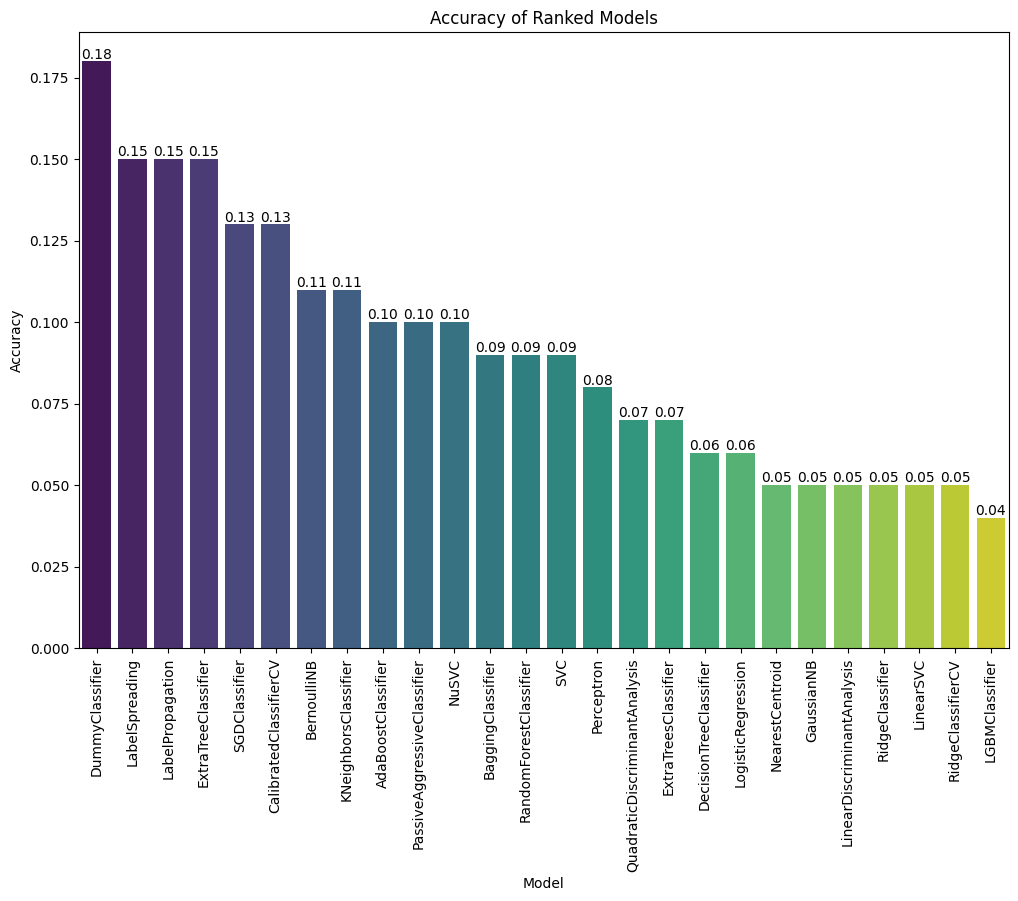

In [86]:
plt.figure(figsize=(12, 8))
sns.barplot(x=ranked_models.index, y='Accuracy', data=ranked_models, palette='viridis')
plt.xticks(rotation=90)
plt.title('Accuracy of Ranked Models')
plt.xlabel('Model')
for index, value in enumerate(ranked_models['Accuracy']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.ylabel('Accuracy')
plt.show()

### Ranking of Selected Models:
- K Nearest Neighbor Classifier
- Decision Tree Classifier
- Logistic Regression

In [87]:
selected_models = ranked_models.loc[['KNeighborsClassifier', 'DecisionTreeClassifier', 'LogisticRegression']]
selected_models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.11,0.10,None,0.10,0.02
DecisionTreeClassifier,0.06,0.06,None,0.06,0.02
LogisticRegression,0.06,0.05,None,0.06,0.03


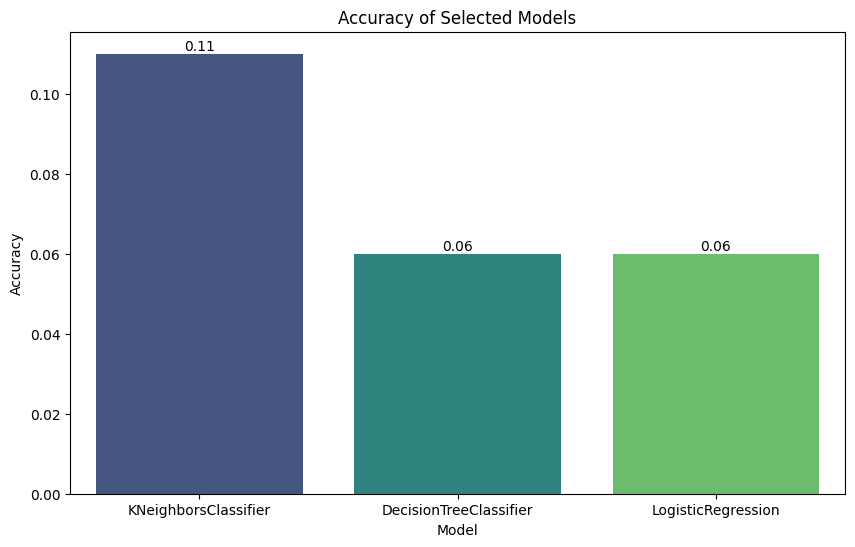

In [88]:
plt.figure(figsize=(10, 6))
sns.barplot(x=selected_models.index, y='Accuracy', data=selected_models, palette='viridis')
plt.title('Accuracy of Selected Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
for index, value in enumerate(selected_models['Accuracy']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.show()